<table width='100%'>
<tr>
<td style='background-color:white'>
    <p align="left">
    Part I<br>
        <b>Lab Machine Learning for Data Science</b><br>
    Summer Semester 2024
    </p>
</td>
<td style='background-color:white'>
    Evita Vardhani - 5587165<br>
    Hyeonhui Lee - 5585677<br>
    Jing Chen - 5582644<br>
</td>
</tr>
</table>

<br>
<center>
    <h1>Getting Insights into an Unsupervised Dataset</h1>
</center>
<br>

In [7]:
import warnings
warnings.filterwarnings('ignore')
!pip3 install dash
!pip3 install dash_bootstrap_components
!pip3 install -U ucimlrepo
!pip install IPython

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Loading the data, Preprocessing, Initial Data Analysis

## 1.1. Loading the data

In [22]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wholesale_customers = fetch_ucirepo(id=292)

# data (as pandas dataframes)
data = pd.concat([wholesale_customers.data.targets, wholesale_customers.data.features], axis=1)

In [23]:
data.head(5)

,Region,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,2,12669,9656,7561,214,2674,1338
1,3,2,7057,9810,9568,1762,3293,1776
2,3,2,6353,8808,7684,2405,3516,7844
3,3,1,13265,1196,4221,6404,507,1788
4,3,2,22615,5410,7198,3915,1777,5185


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Channel           440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [25]:
data.describe()

,Region,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,2.543182,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.774272,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,2.000000,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,3.000000,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,3.000000,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,3.000000,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## 1.2. Preprocessing

In [26]:
# Counting the number of missing values per column
print(data.isna().sum())

Region              0
Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [27]:
# Drop the metadata
X = data.drop("Channel", axis=1)
X = X.drop("Region", axis=1)

In [28]:
# Convert it into numpy array
X_arr = np.array(X)

## 1.3. Initial Data Analysis

### 1.3.1. Plots

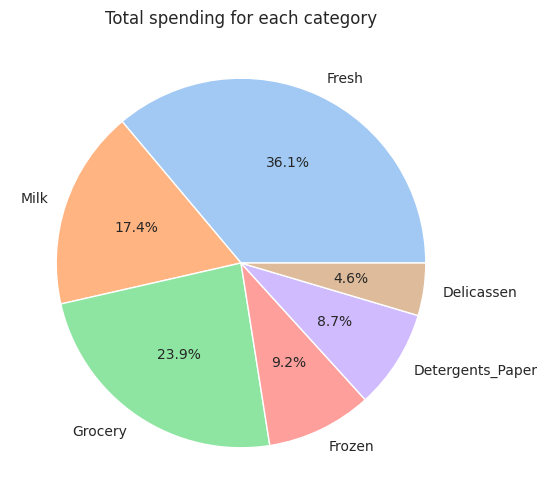

In [29]:
categories = data.columns
array_customes = data.values
categories = np.array(categories)[2:]
array_customes =  np.delete(array_customes, [0, 1], axis=1)
total_spending = np.sum(array_customes,axis=0)
sns.set_style("darkgrid")
plt.figure(figsize=(6,6))
plt.pie(total_spending, labels=categories, autopct='%1.1f%%',colors=sns.color_palette("pastel"))
plt.title('Total spending for each category')
plt.show()

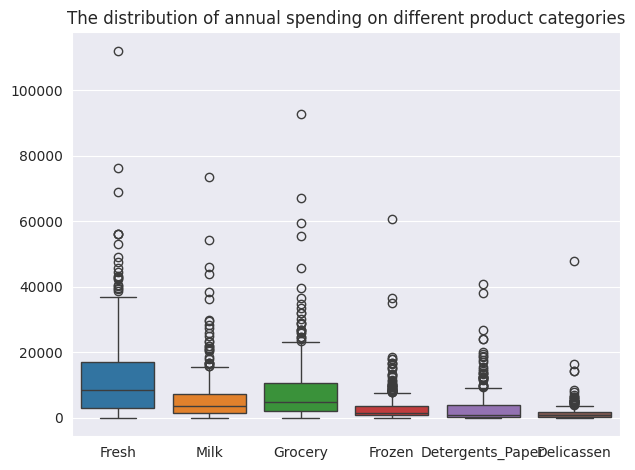

In [30]:
sns.boxplot(data=data[categories])
plt.title('The distribution of annual spending on different product categories')
plt.tight_layout()
plt.show()

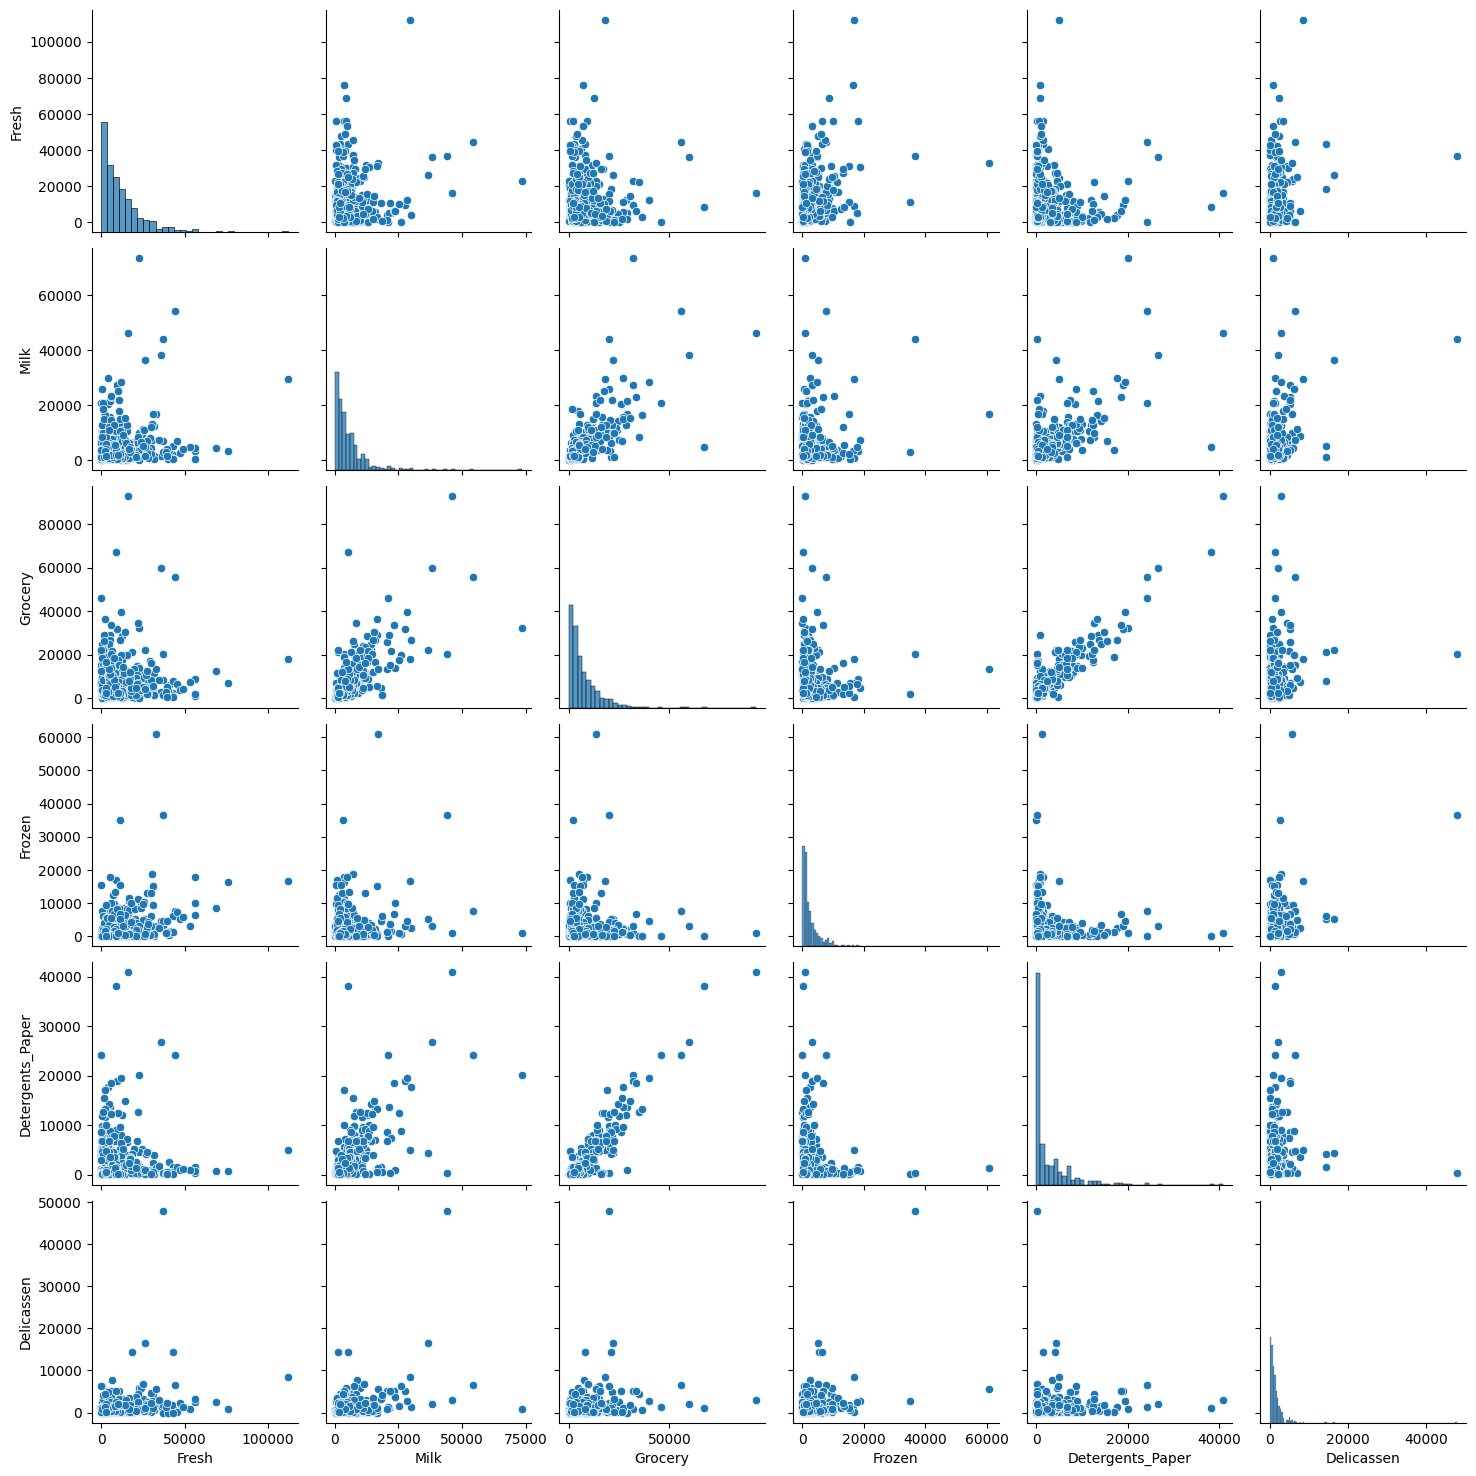

In [ ]:
sns.pairplot(data=X)
plt.show()

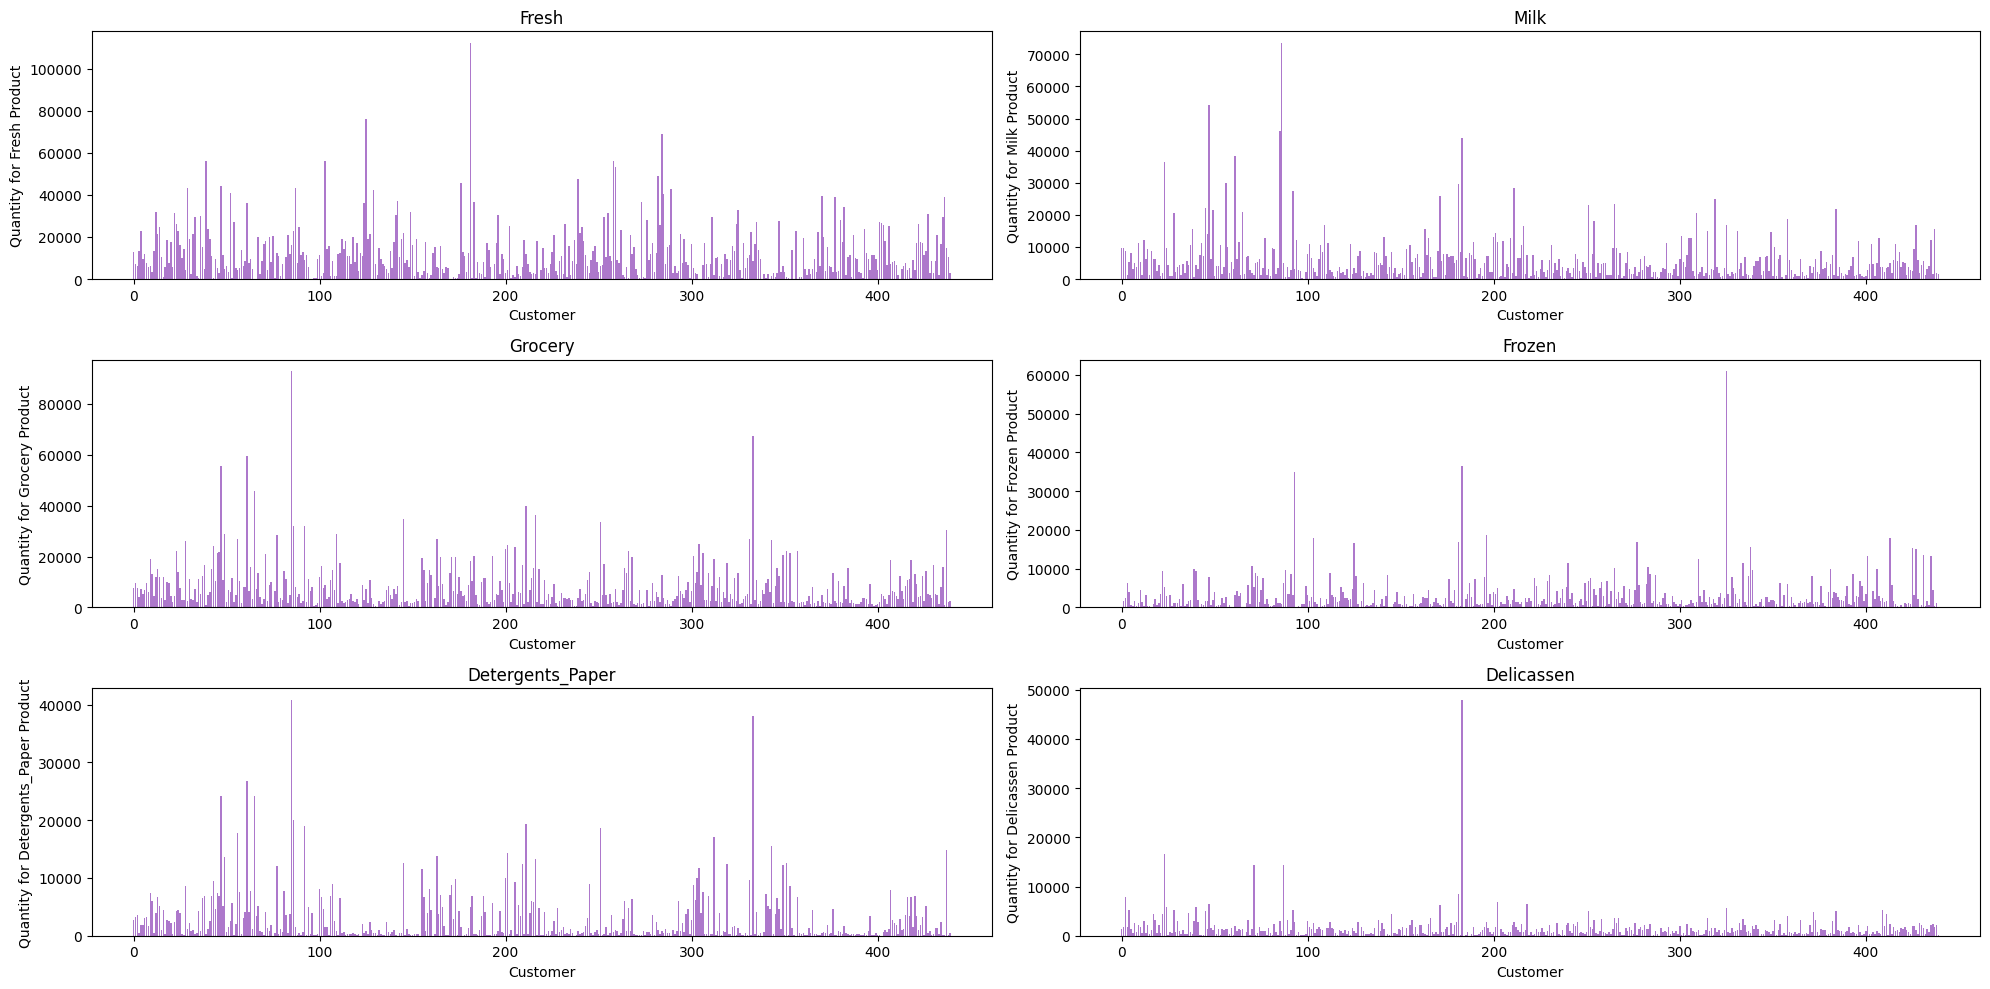

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
start_index=0
for idx, column_name in enumerate(X):
    if idx >= start_index:

        row = (idx-start_index) // 2
        col = (idx-start_index) % 2

        ax[row,col].bar(X[column_name].index, X[column_name], color='#AD78CB')
        ax[row,col].set_xlabel('Customer')
        ax[row,col].set_ylabel('Quantity for {} Product'.format(column_name))
        ax[row,col].set_title(column_name)

plt.tight_layout()
plt.show()

### 1.3.2. Non-linear transformation

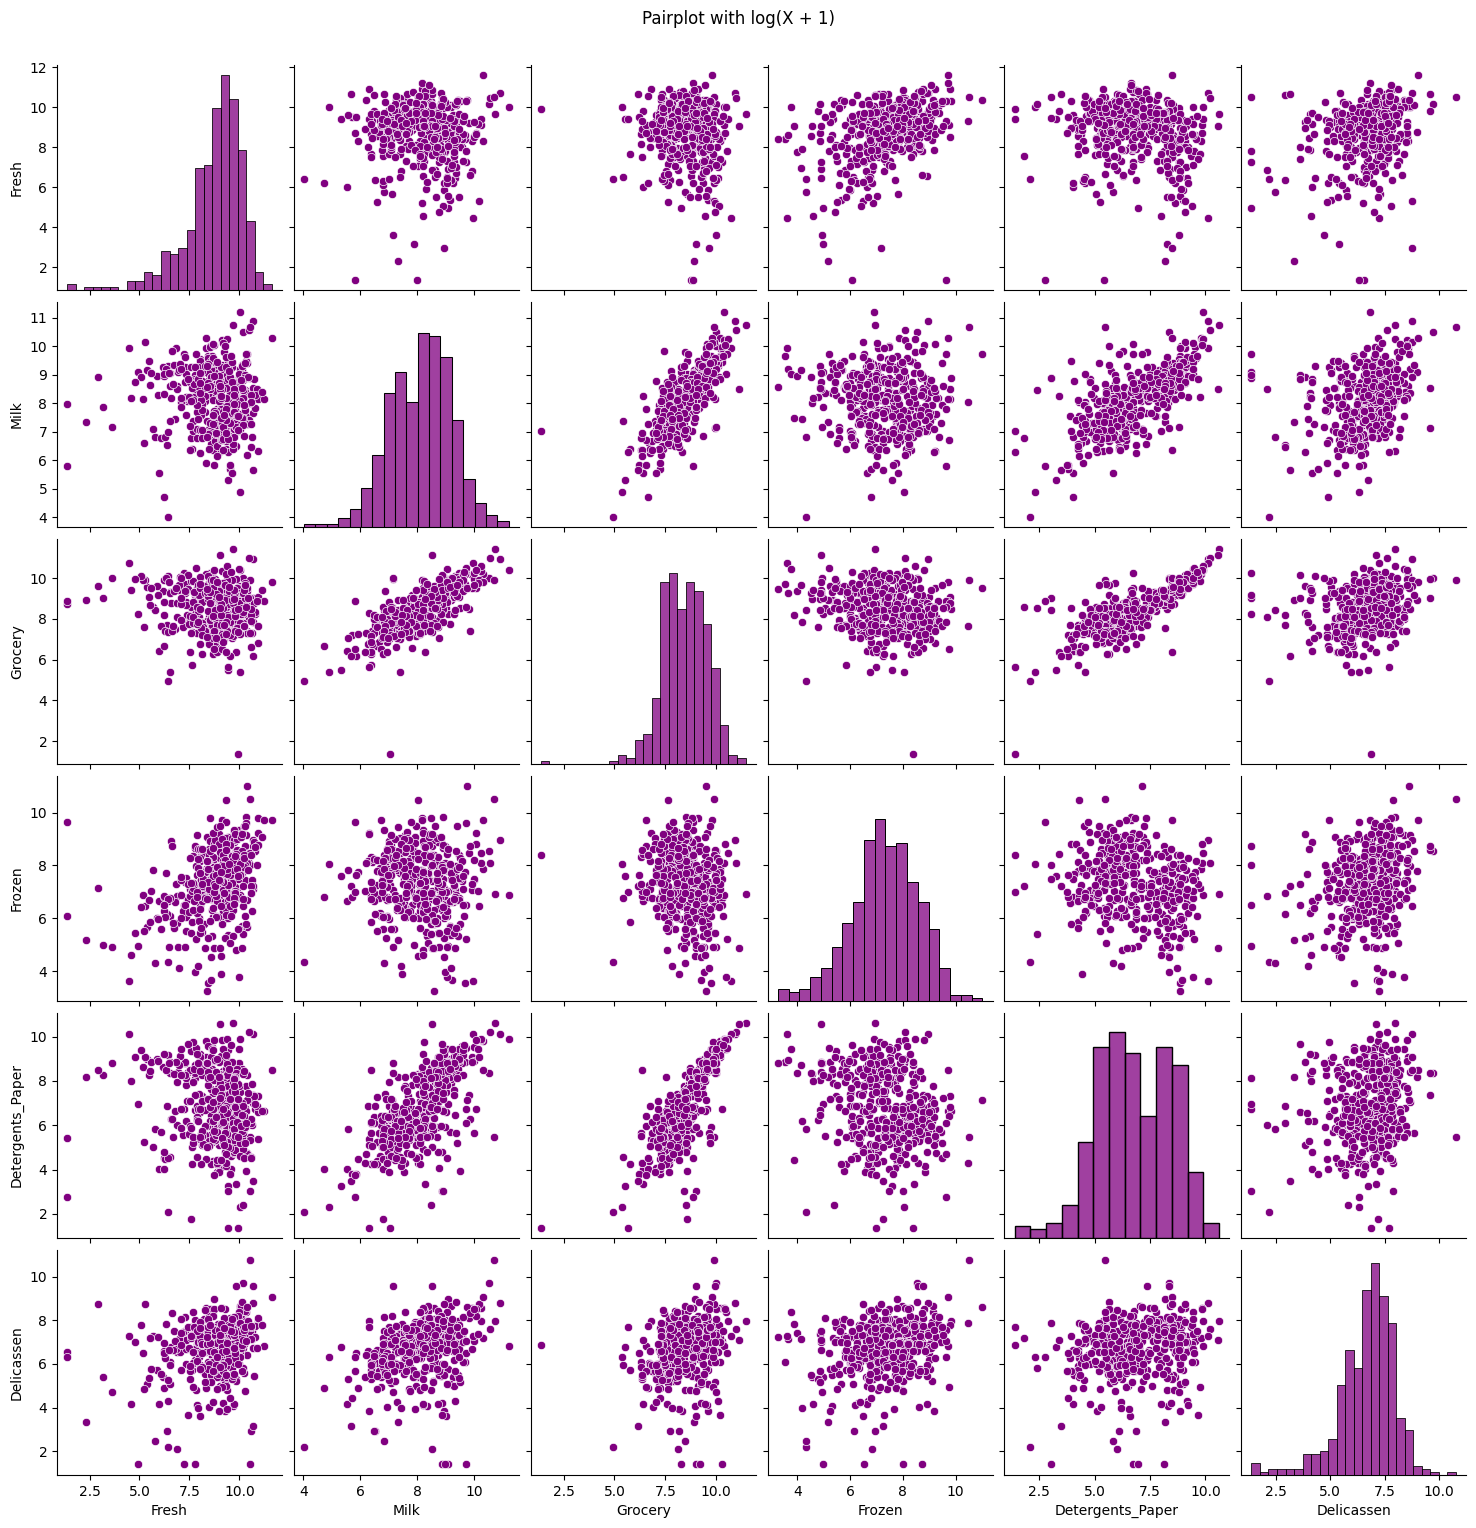

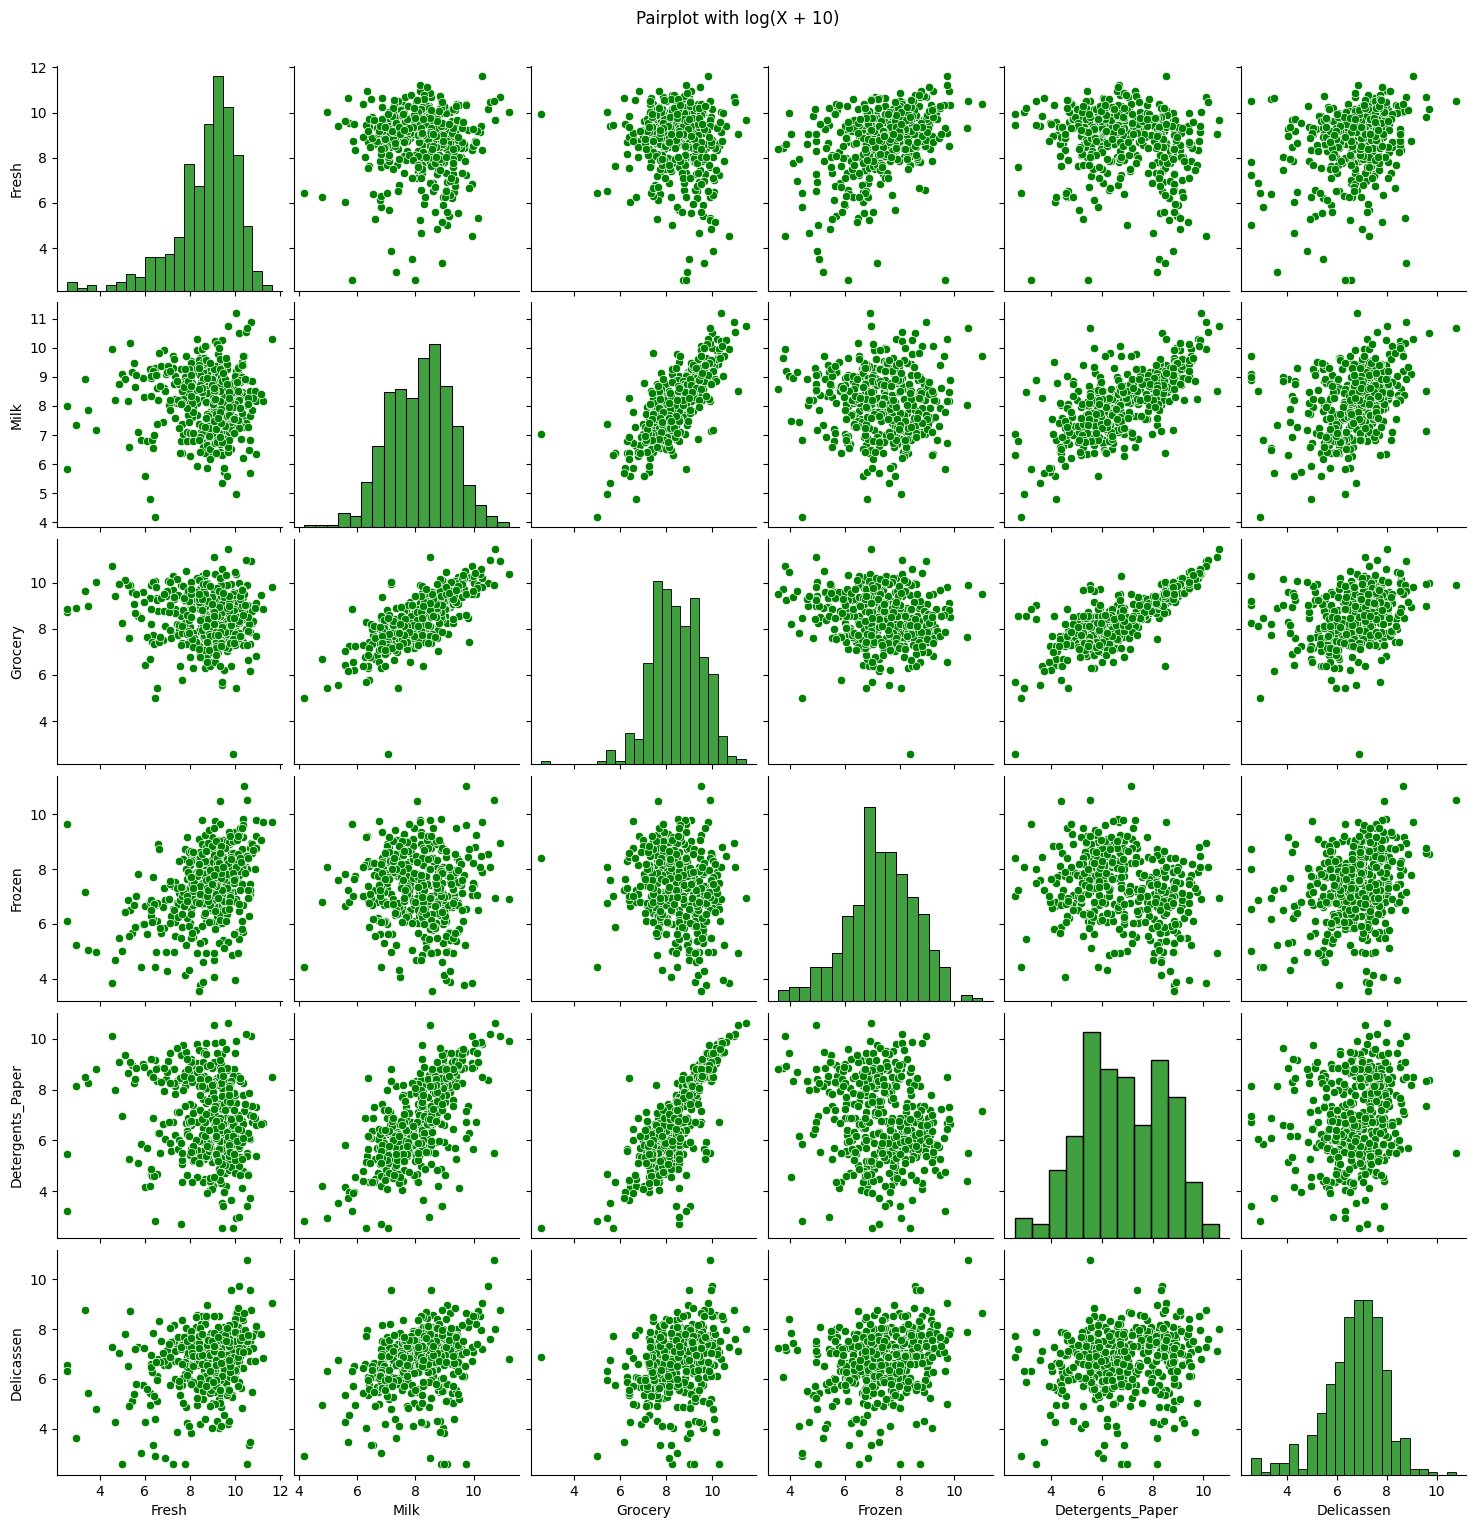

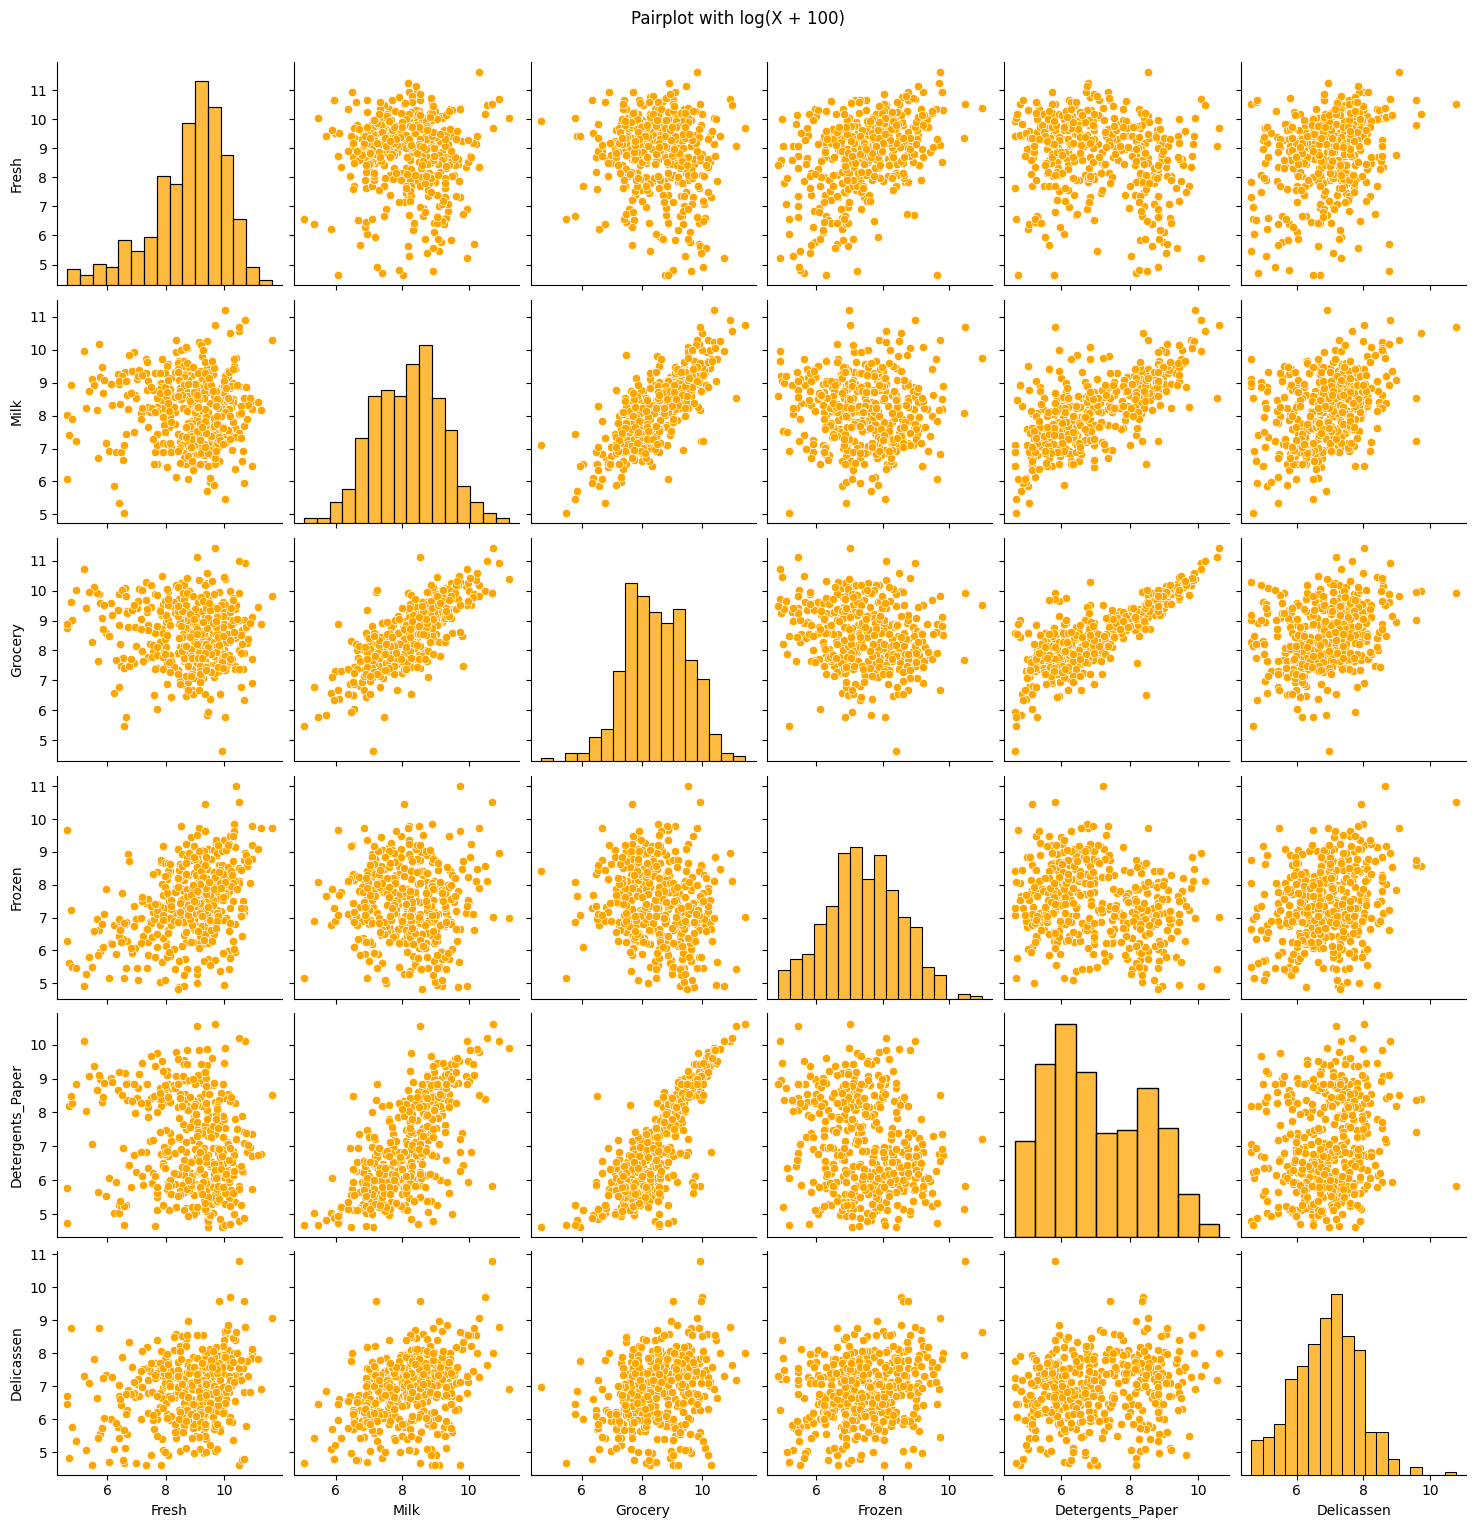

In [12]:
g1 = sns.pairplot(data=np.log(X + 1), plot_kws={'color': 'purple'}, diag_kws={'color': 'purple'})
g1.fig.suptitle('Pairplot with log(X + 1)', y=1.02)

g2 = sns.pairplot(data=np.log(X + 10), plot_kws={'color': 'green'}, diag_kws={'color': 'green'})
g2.fig.suptitle('Pairplot with log(X + 10)', y=1.02)

g3 = sns.pairplot(data=np.log(X + 100), plot_kws={'color': 'orange'}, diag_kws={'color': 'orange'})
g3.fig.suptitle('Pairplot with log(X + 100)', y=1.02)

plt.show()

In [31]:
X_arr = np.log(X_arr + 10)

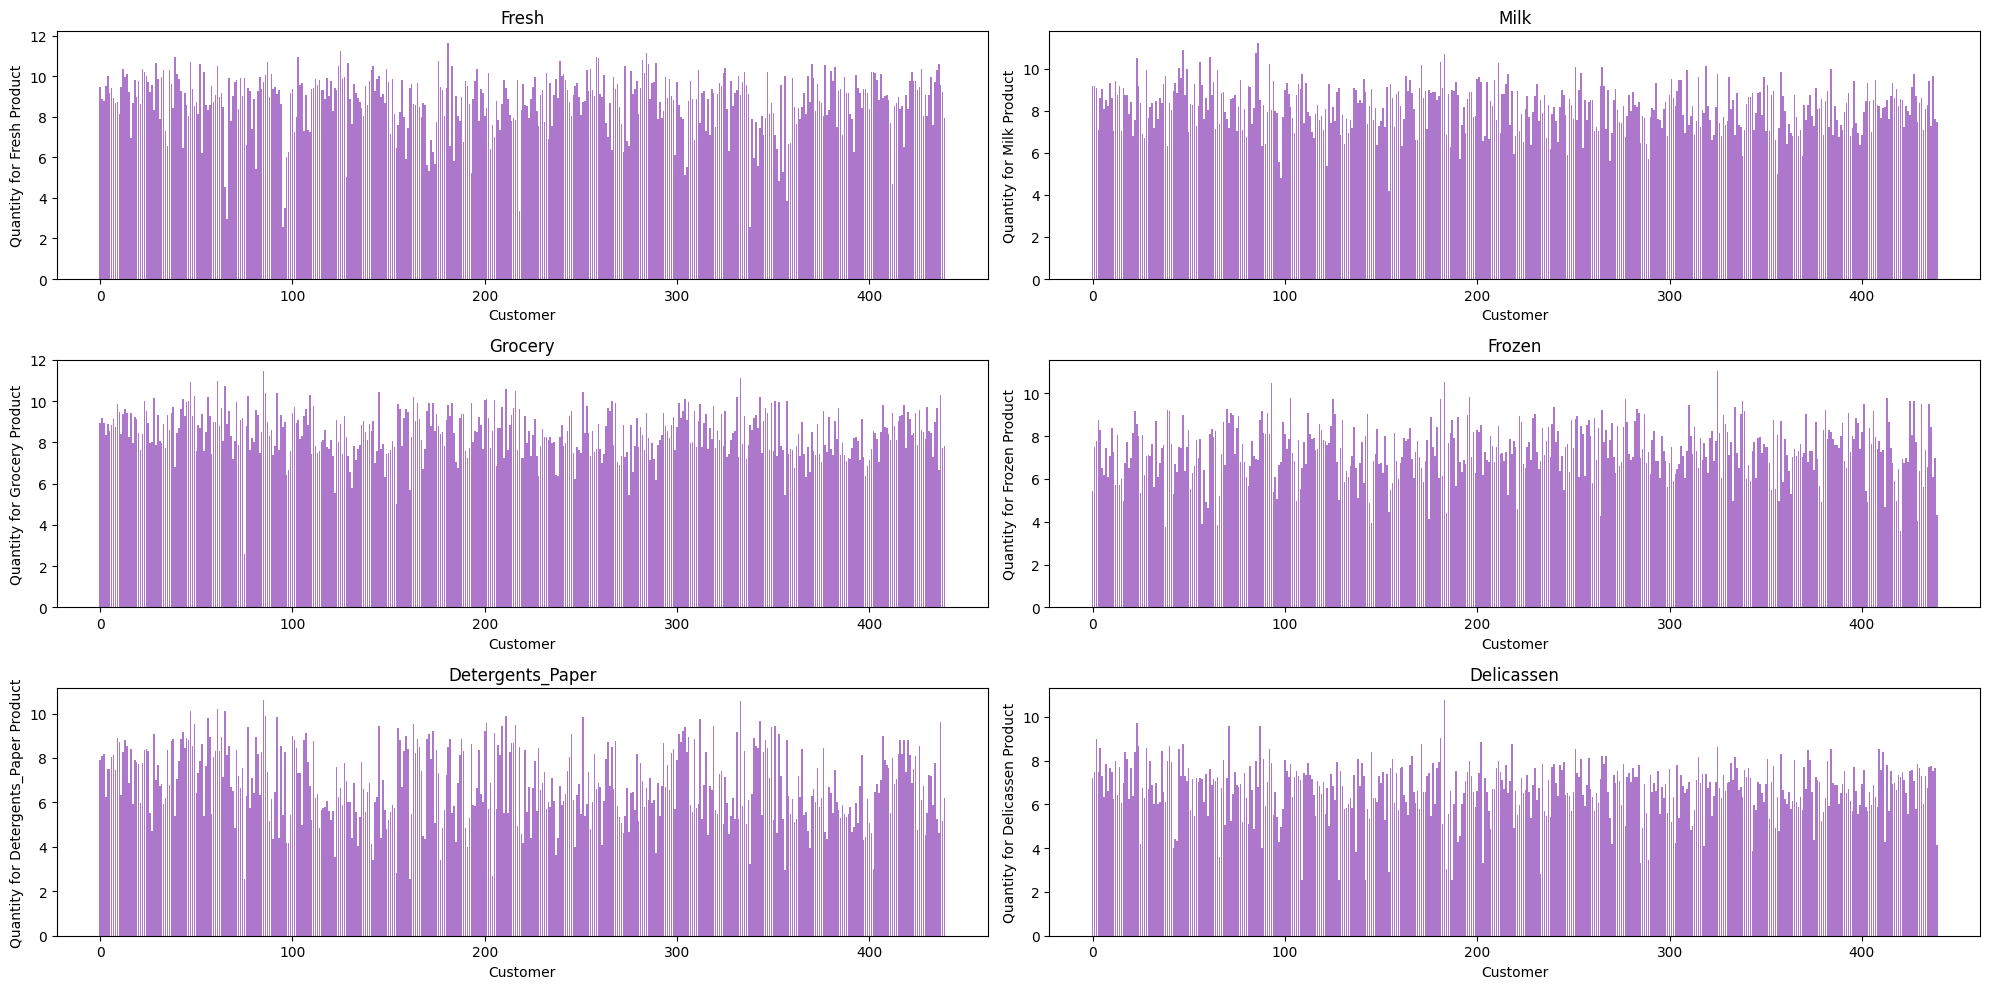

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

for idx in range(X_arr.shape[1]):
    row = idx // 2
    col = idx % 2

    column_data = X_arr[:, idx] # len == 440

    ax[row, col].bar(np.arange(len(column_data)), column_data, color='#AD78CB')
    ax[row, col].set_xlabel('Customer')
    ax[row, col].set_ylabel('Quantity for {} Product'.format(X.columns[idx]))
    ax[row, col].set_title('{}'.format(X.columns[idx]))

plt.tight_layout()
plt.show()

# 2. Detecting Anomalies

## 2.1. Hard minimum

### 2.1.1. Hard_min()

In [13]:
def hard_min(data):
    squared_distances = scipy.spatial.distance.cdist(data, data) ** 2 # $1 Hard min should use the square euclidean distance
    np.fill_diagonal(squared_distances, np.nan)
    hardmins = np.nanmin(squared_distances, axis=1)
    return hardmins

### 2.1.2. Top 10 Anomalies

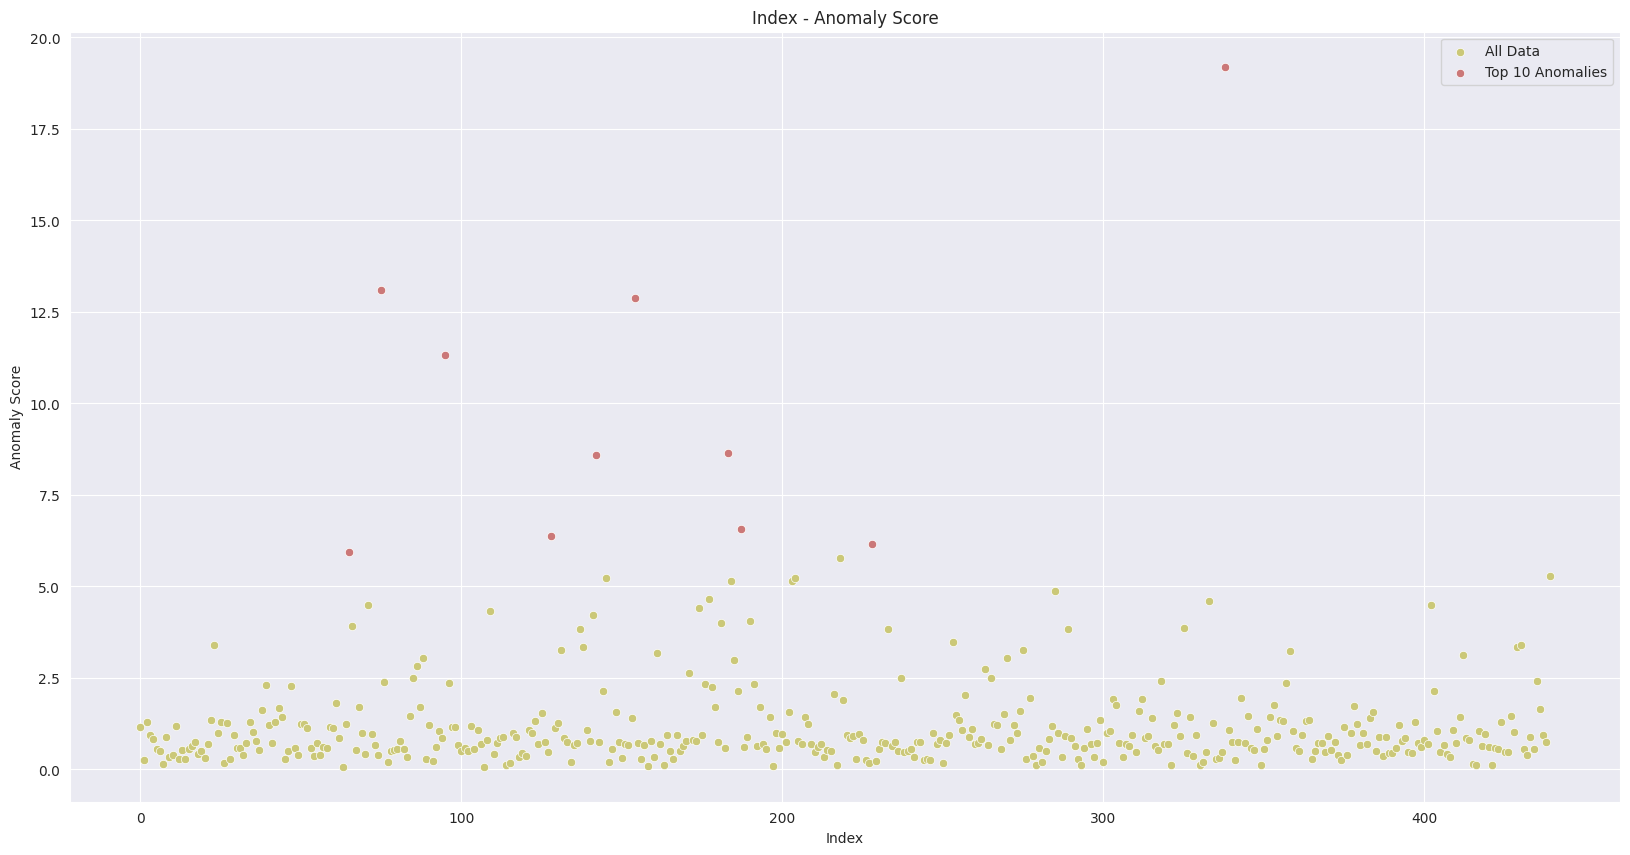

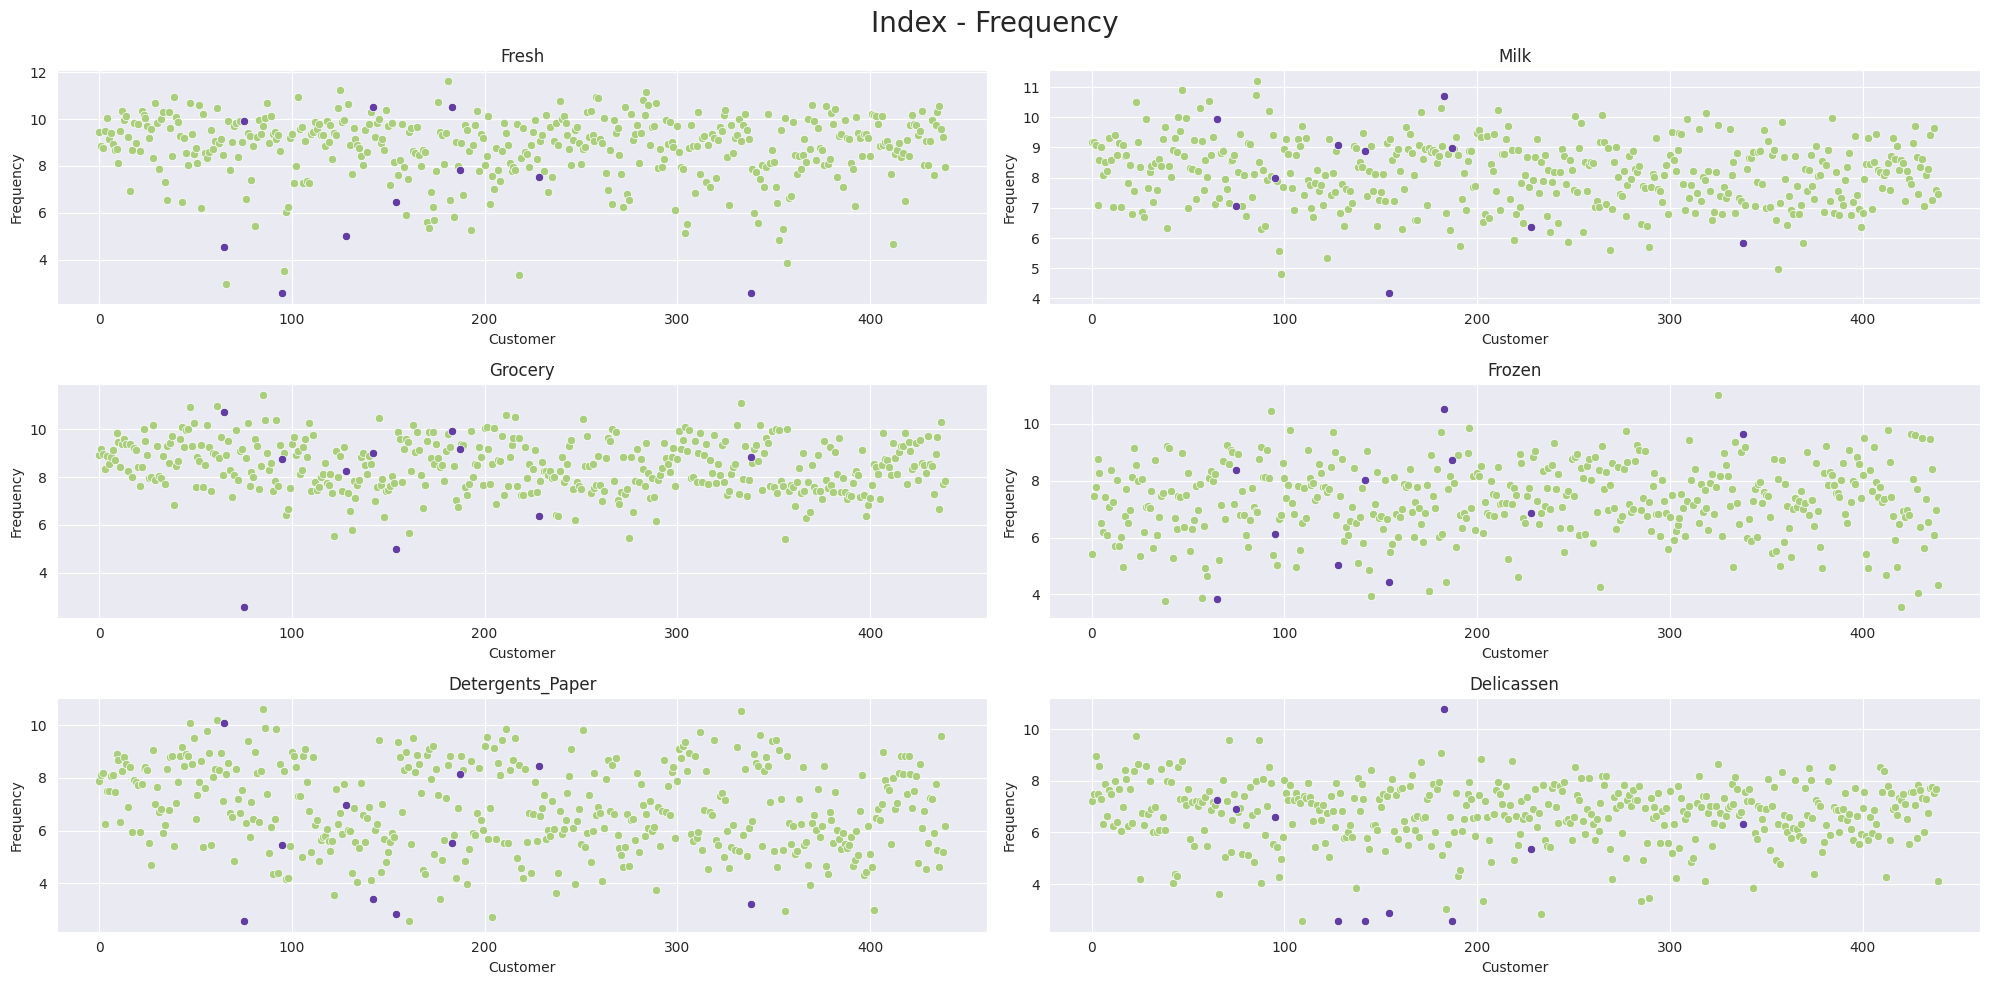

,Num. of the customer,Score,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,339,19.200908,2.564949,5.837730,8.858084,9.655731,3.218876,6.327937
1,76,13.094220,9.923682,7.044905,2.564949,8.393216,2.564949,6.892642
2,155,12.870776,6.448889,4.174387,4.990433,4.442651,2.833213,2.890372
3,96,11.329252,2.564949,7.982758,8.742255,6.109248,5.451038,6.577861
4,184,8.636633,10.514801,10.691035,9.912447,10.506272,5.517453,10.777977
5,143,8.582687,10.519916,8.876545,9.019543,8.008033,3.401197,2.564949
6,188,6.556690,7.803027,8.988696,9.193092,8.744966,8.151622,2.564949
7,129,6.389484,5.010635,9.088963,8.251403,5.023881,6.977281,2.564949
8,229,6.165231,7.538495,6.375025,6.366470,6.866933,8.470521,5.361292
9,66,5.947661,4.553877,9.950800,10.732869,3.828641,10.095801,7.267525


In [32]:
# top 10 (anomaliness)
def top10_table(data, y_js):
    columns = ["Num. of the customer", "Score", "Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
    dic = {k: [] for k in columns}
    top_10_indices = np.argsort(y_js)[-10:][::-1]
    for idx in top_10_indices:
        # index + 1 = num. of the customer
        dic["Num. of the customer"].append(idx + 1)
        dic["Score"].append(y_js[idx])
        dic["Fresh"].append(data[idx][0])
        dic["Milk"].append(data[idx][1])
        dic["Grocery"].append(data[idx][2])
        dic["Frozen"].append(data[idx][3])
        dic["Detergents_Paper"].append(data[idx][4])
        dic["Delicassen"].append(data[idx][5])
    table = pd.DataFrame(dic)

    # Visualize the top 10 anomaly scores
    plt.figure(figsize=(20, 10))
    sns.scatterplot(x=range(len(y_js)), y=y_js, color='#CBC878', label='All Data')
    sns.scatterplot(x=top_10_indices, y=table["Score"], color='#CB7878', label='Top 10 Anomalies')
    plt.xlabel('Index')
    plt.ylabel('Anomaly Score')
    plt.title('Index - Anomaly Score')
    plt.legend()
    plt.show()

    # visualize the top 10 anomaly data for each product (the spending)
    plt.figure(figsize=(20, 10))
    plt.suptitle('Index - Frequency',fontsize=20)
    for i in range(data.shape[1]):
        plt.subplot(3, 2, i + 1)
        sns.scatterplot(x=range(data.shape[0]), y=data[:, i], color='#AACE7E')
        sns.scatterplot(x=top_10_indices, y=data[top_10_indices, i], color='#613DA4')
        plt.xlabel('Customer')
        plt.ylabel('Frequency')
        plt.title(columns[i + 2])
    plt.tight_layout()
    plt.show()

    return table

y_js = hard_min(X_arr)
top10_table(X_arr, y_js)

## 2.2. Soft minimum for reproducibility

### 2.2.1. soft_min()

In [33]:
def soft_min(data, gamma):
    squared_distances = scipy.spatial.distance.cdist(data, data) ** 2
    np.fill_diagonal(squared_distances, np.nan)
    N = data.shape[0]
    softmins = np.zeros(N)
    for j in range(N):
        softmins[j] = (-1 / gamma) * np.log(np.sum(np.exp(-gamma * squared_distances[j, np.arange(N) != j])) / (N-1))
    return softmins

### 2.2.2. Bootstrapping
sample size : 440 \
the number of sampling: 1000 \
(with repetition)

In [34]:
def compute_anomaly_avg_and_spread(data, gamma, num_bootstrap):
    N = data.shape[0] # 440
    samples_y_js = np.zeros((N, num_bootstrap))
    for i in range(num_bootstrap):
        sample_indices = np.random.choice(N, N, replace=True)
        bootstrap_sample = data[sample_indices]
        squared_distances = scipy.spatial.distance.cdist(bootstrap_sample, bootstrap_sample) ** 2 # $
        for j in range(N):
            distance = np.array(squared_distances[j, np.arange(N) != j])
            samples_y_js[sample_indices[j], i] = (-1 / gamma) * np.log(np.sum(np.exp(-gamma * distance)) / (N-1))

    # Compute the mean and standard deviation along the rows
    samples_y_js = np.ma.masked_equal(samples_y_js, 0)
    y_js_avg = np.mean(samples_y_js, axis=1).filled(0)
    y_js_spread = np.std(samples_y_js, axis=1).filled(0)
    return y_js_avg, y_js_spread

In [35]:
def evaluate_gamma(data, gammas, num_bootstrap):
    results = {}
    for gamma in gammas:
        anomaly_avg, anomaly_spread = compute_anomaly_avg_and_spread(data,gamma, num_bootstrap)
        results[gamma] = (anomaly_avg, anomaly_spread)
    return results

def plot_results(results):
    for gamma, (avg, spread) in results.items():
        top_10_indices = np.argsort(avg)[-10:]
        top_10_avg = avg[top_10_indices]
        top_10_spread = spread[top_10_indices]

        plt.figure(figsize=(10, 6))
        plt.errorbar(range(len(avg)), avg, yerr=spread, fmt='o', ecolor= 'g', color='r',elinewidth=1, ms=1, label=f'Gamma={gamma}')
        plt.errorbar(top_10_indices, top_10_avg, yerr=top_10_spread, fmt='o', ecolor='b', color='m', elinewidth=1, ms=5, label='Top 10 Anomalies')
        plt.xlabel('Instance Index')
        plt.ylabel('Anomaly Score')
        plt.legend()
        plt.title(f'Instance Index - Anomaly Score for Gamma={gamma}')
        plt.show()

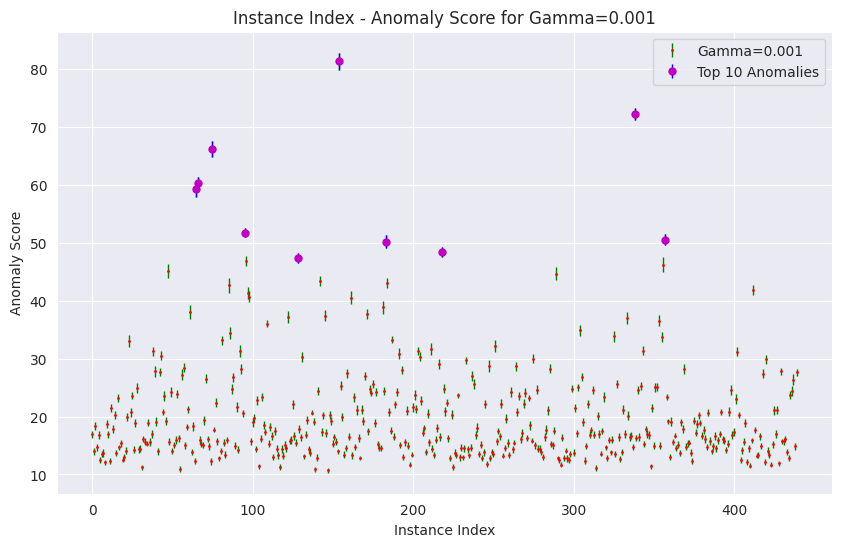

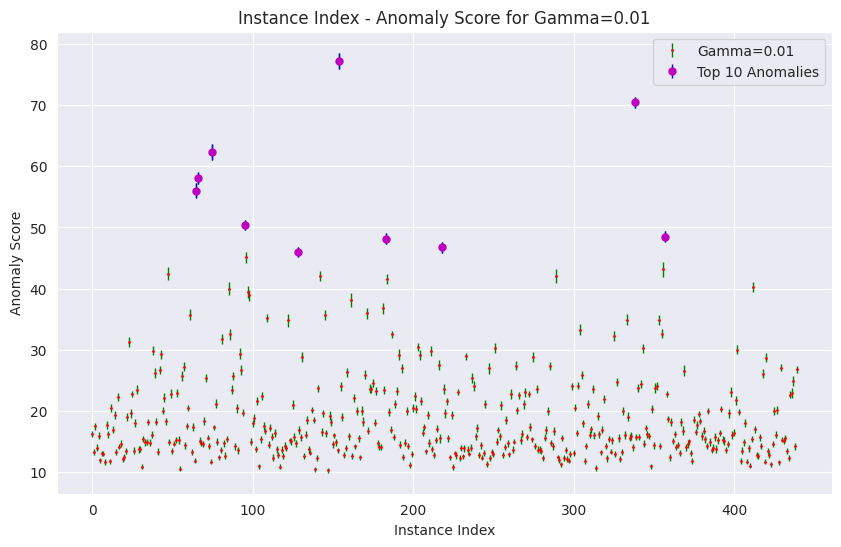

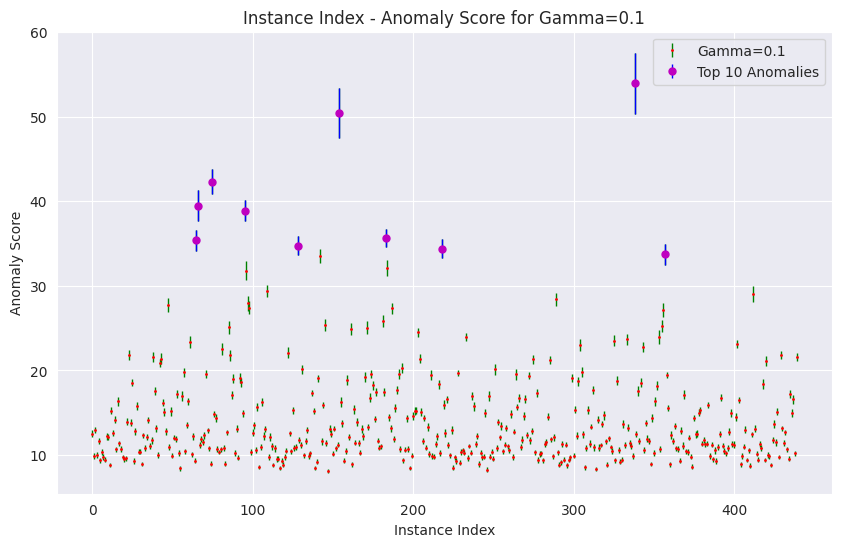

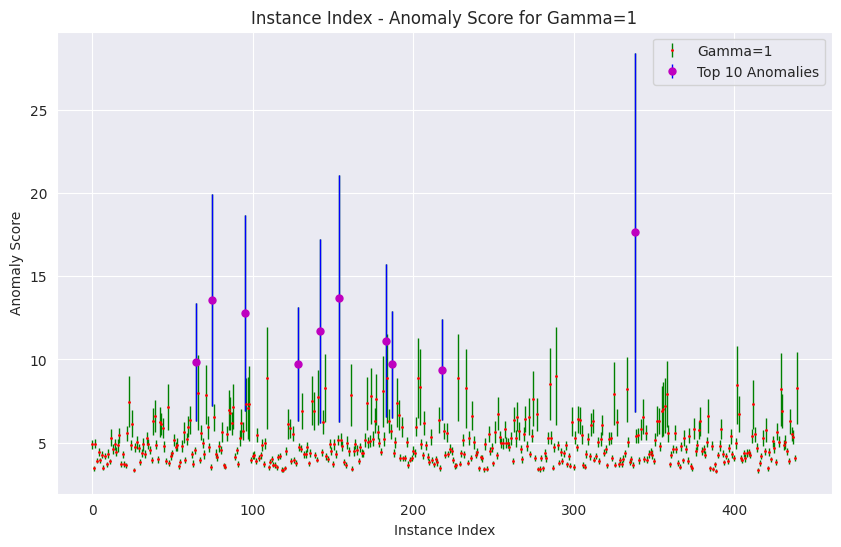

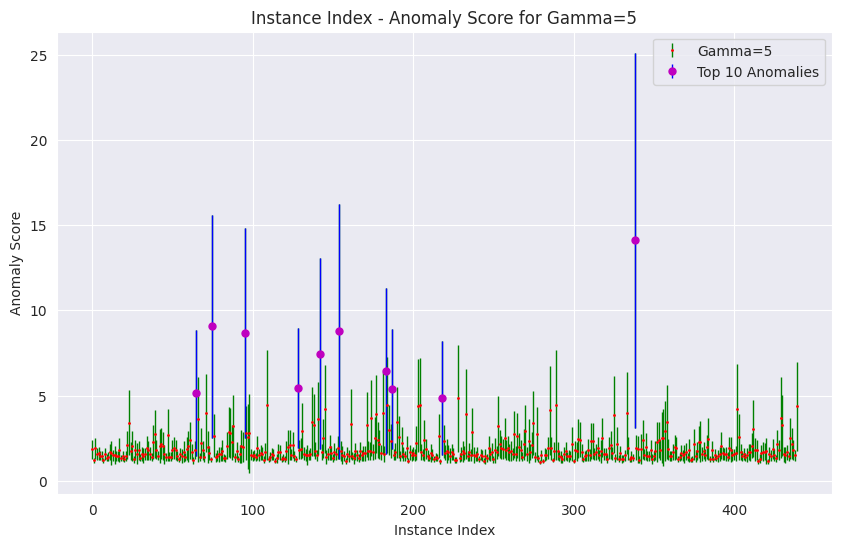

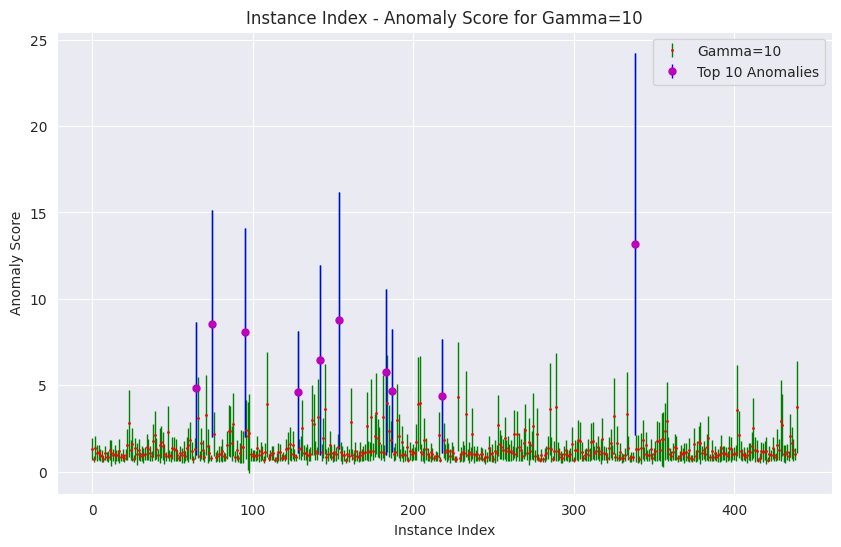

In [36]:
gammas = [0.001, 0.01, 0.1, 1, 5, 10]
results = evaluate_gamma(X_arr, gammas, 1000)
plot_results(results)

Looks like the separability is the best with gamma == 0.1.

### 2.3.3. Top 10 Anomalies with Gamma = 0.1

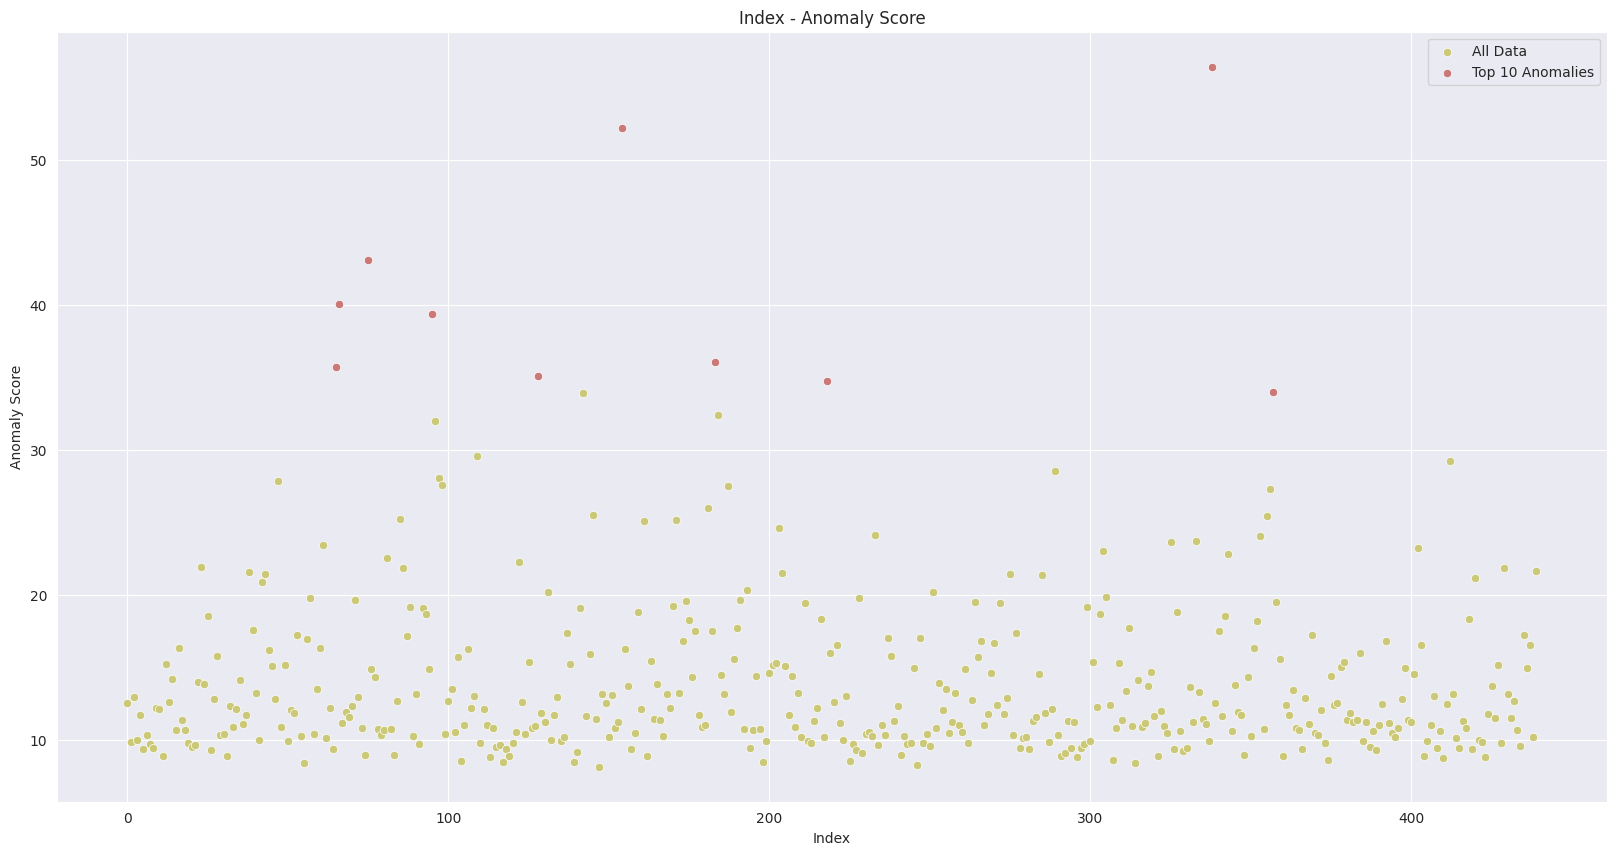

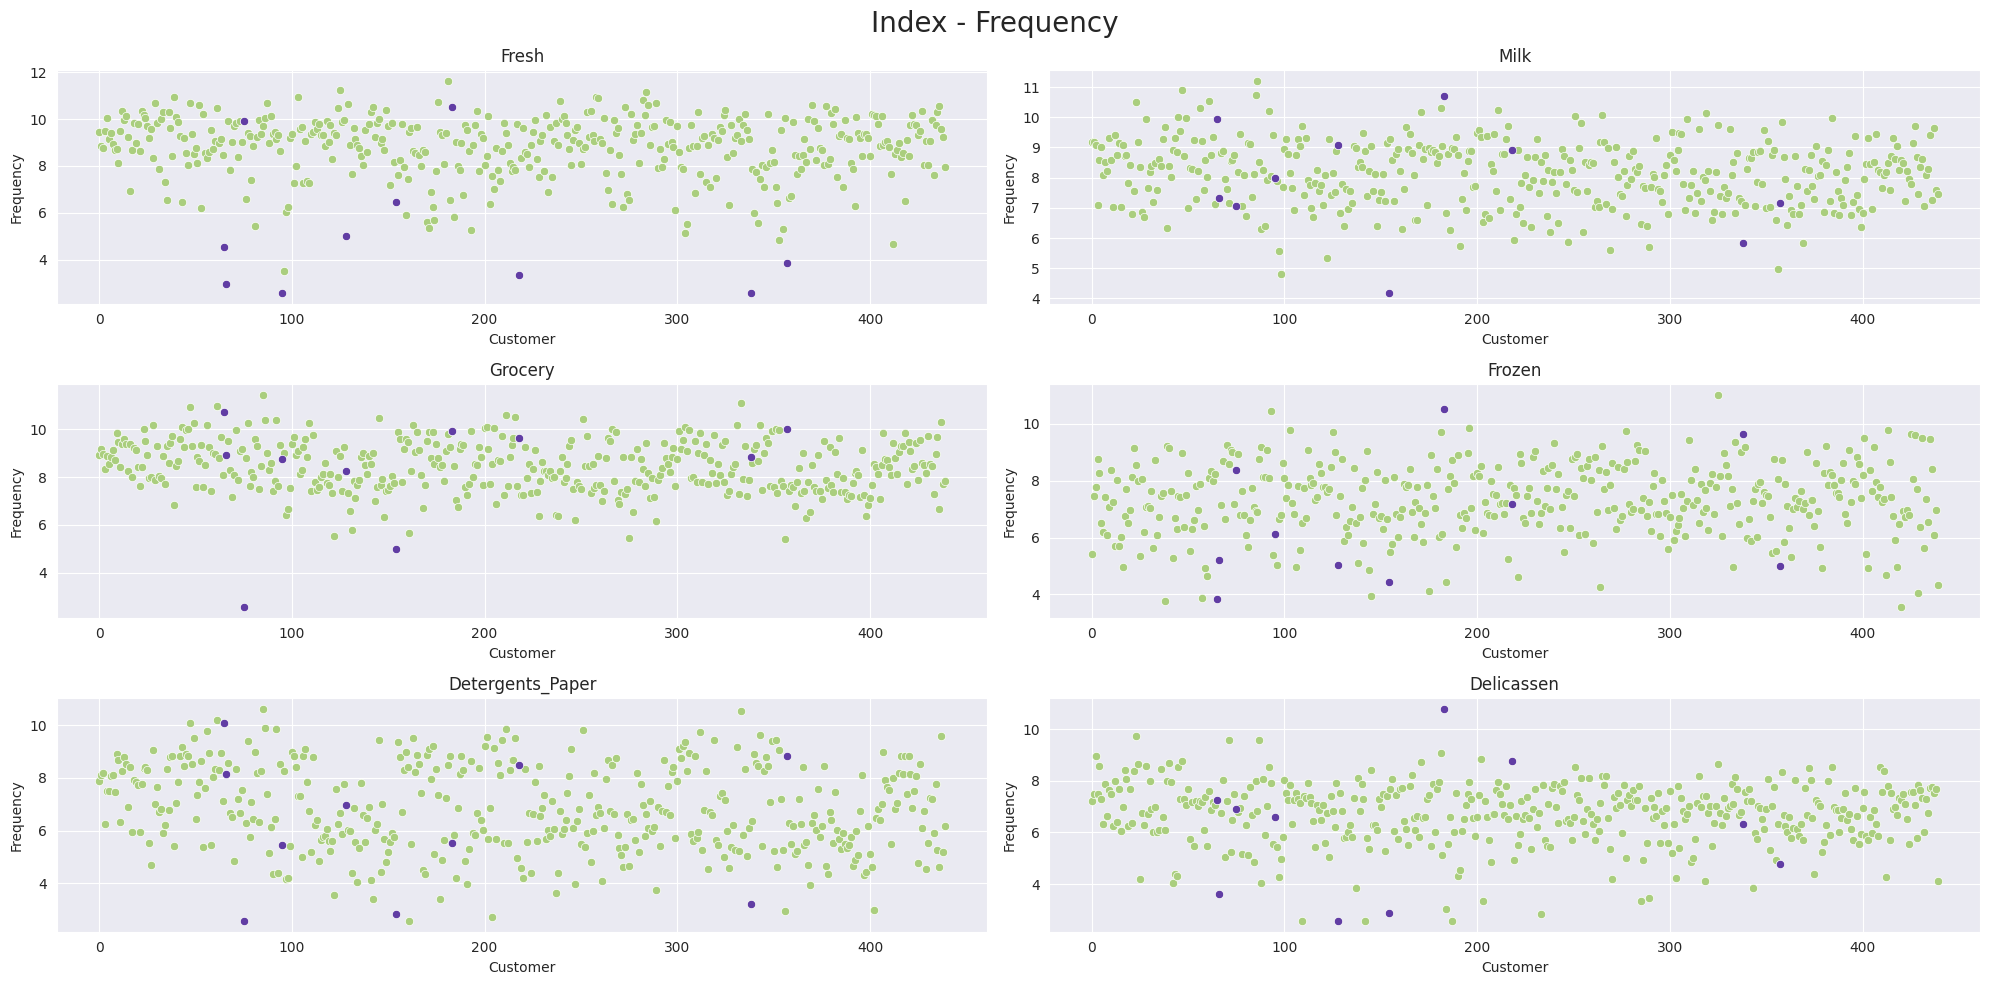

,Num. of the customer,Score,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,339,56.412571,2.564949,5.837730,8.858084,9.655731,3.218876,6.327937
1,155,52.169549,6.448889,4.174387,4.990433,4.442651,2.833213,2.890372
2,76,43.100336,9.923682,7.044905,2.564949,8.393216,2.564949,6.892642
3,67,40.038439,2.944439,7.342132,8.912877,5.220356,8.154213,3.610918
4,96,39.386764,2.564949,7.982758,8.742255,6.109248,5.451038,6.577861
5,184,36.045089,10.514801,10.691035,9.912447,10.506272,5.517453,10.777977
6,66,35.747192,4.553877,9.950800,10.732869,3.828641,10.095801,7.267525
7,129,35.102803,5.010635,9.088963,8.251403,5.023881,6.977281,2.564949
8,219,34.741580,3.332205,8.924523,9.630037,7.166266,8.477828,8.761237
9,358,34.017930,3.850148,7.158514,10.011534,4.990433,8.818334,4.787492


In [37]:
y_js = soft_min(X_arr, gamma = 0.1)
top10_table(X_arr, y_js)

# 3. Getting Insights into Anomalies

## 3.1. Relation Between Anomalies and Meta-Data

In [38]:
y_js = soft_min(X_arr, gamma = 0.1)
channel = np.array(data["Channel"])
region = np.array(data["Region"])
tmp_df = pd.DataFrame({"Channel": channel, "Anomaly Score": y_js, "Region": region})

### 3.1.1. Based on Channel

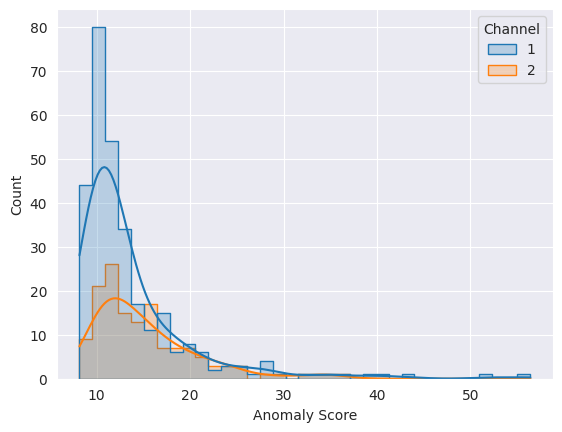

In [39]:
sns.histplot(data = tmp_df, x = "Anomaly Score",hue = "Channel", element='step', kde=True, palette="tab10")
plt.ylabel("Count")
plt.show()

### 3.1.2. Based on Region

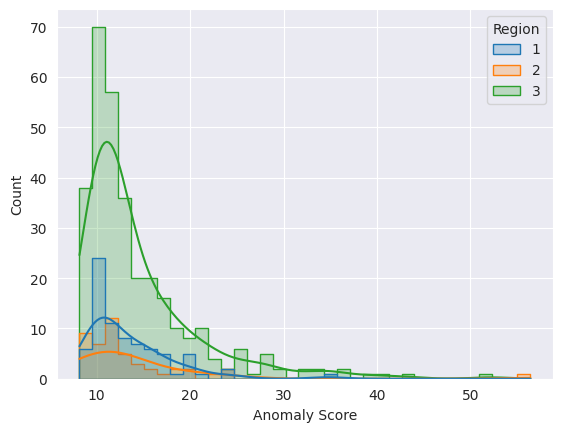

In [40]:
sns.histplot(data = tmp_df, x = "Anomaly Score", hue = "Region", element='step', kde=True, palette="tab10")
plt.ylabel("Count")
plt.show()

## 3.2. Identifying Input Features that Drive Anomaly

In [41]:
def compute_contribution_to_anomaly_score(data, gamma):
    num_instances = len(data) # 440

    squared_distances = scipy.spatial.distance.cdist(data, data) ** 2 # $
    anomaly_scores = soft_min(data, gamma)
    contributions = np.zeros((num_instances, num_instances))
    for j in range(num_instances):
        # Exclude the self-distance
        distance_j = np.delete(squared_distances[j], j)
        total_exp_distances = np.sum(np.exp(-gamma * distance_j))
        for i in range(num_instances):
            if i != j:
                exp_distances =np.exp(-gamma * squared_distances[j][i])
                contributions[j][i] = exp_distances / total_exp_distances * anomaly_scores[j]

    return contributions

def propagate_contributions_to_input_features(data, contributions):
    num_instances, num_features = data.shape
    feature_contributions = np.zeros((num_instances, num_features))

    for j in range(num_instances):
        for i in range(num_features):
            feature_sum = 0
            for k in range(num_instances):
                features_distance = data[k] - data[j]
                if k != j and np.linalg.norm(features_distance) !=0:
                    feature_sum += (np.abs(features_distance)[i]) ** 2 / np.linalg.norm(features_distance) ** 2 * contributions[j][k]
            feature_contributions[j, i] = feature_sum
    return feature_contributions

contributions = compute_contribution_to_anomaly_score(X_arr, 0.1)
feature_contributions = propagate_contributions_to_input_features(X_arr, contributions)


In [42]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px
import plotly.graph_objects as go
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

# Load your data
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(X_arr)
df = pd.DataFrame(data_2d, columns=['t_SNE 1', 't_SNE 2'])
df['index'] = df.index
top_10_indices = np.argsort(y_js)[-10:]
df['colors'] = ['anomalies' if i in top_10_indices else 'non_anomalies' for i in df.index]
color_discrete_map = {'anomalies': 'blue', 'non_anomalies': 'orange'}
# Create the scatter plot with t-SNE results
fig = px.scatter(df, x='t_SNE 1', y='t_SNE 2', hover_data=['index'], color='colors',color_discrete_map=color_discrete_map, labels={'t_SNE 1': 't-SNE 1', 't_SNE 2': 't-SNE 2'})
fig.update_traces(marker=dict(size=8))

# Define the modal for displaying histograms
modal = html.Div(
    [
        dbc.Modal(
            [
                dbc.ModalHeader("Feature Contributions"),
                dbc.ModalBody(
                    dcc.Graph(id='histogram')
                ),
                dbc.ModalFooter(
                    dbc.Button("Close", id="close-modal", className="ml-auto")
                ),
            ],
            id="modal",
            size="lg",
            centered=True,
        ),
    ]
)

# Define the app layout
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.layout = dbc.Container([
    html.H1("t-SNE Scatter Plot"),
    dcc.Graph(id='scatter-plot', figure=fig),
    modal
])

# Define callback to show modal and update histogram on click
@app.callback(
    [Output("modal", "is_open"), Output('histogram', 'figure')],
    [Input("scatter-plot", "clickData"), Input("close-modal", "n_clicks")],
    [dash.dependencies.State("modal", "is_open")],
)
def toggle_modal(click_data, n_clicks, is_open):
    ctx = dash.callback_context
    if ctx.triggered:
        prop_id = ctx.triggered[0]["prop_id"]
        if prop_id == "scatter-plot.clickData":
            if click_data:
                point_index = click_data["points"][0]["customdata"][0]
                customes_spending = array_customes[point_index]
                # Retrieve feature contributions
                feature_contribution = feature_contributions[point_index]
                #create ylabel
                y_labels = [f"{categories[i]} (x{i}= {customes_spending[i]})" for i in range(len(categories))]
                # Create histogram
                histogram_fig = go.Figure(go.Bar(x=feature_contribution,y=y_labels,orientation='h',marker_color='red'))
                histogram_fig.update_layout(title=f"Feature Contributions for Index {point_index}")
                return not is_open, histogram_fig
    return is_open, dash.no_update

if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

# 4. Discussion

## 4.1. Relation between anomalies and meta data
After we visualize the soft anomaly scores and grouping them by region and channel, a distinctive pattern is observed in the graph starting from anomaly score 30 and beyond, particularly in channel 1(Horeca) and region 2(Oporto). This region and channel exhibit a relatively higher frequency of specific anomaly scores and a greater number of points with higher anomaly scores.

The reason for the higher number of anomalies in channel 1 is that the customers with channel 1 predominantly caters to theirt customers. And as a result, they are more likely to purchase in larger quantities compared to the customers with channel 2 (regular retail). Consequently, being categorized under channel 1 significantly increses the probabiliy to be classifed as anomalies.

Similarly, sales vary by region. Region 1 corresponds to Lisbon, region 2 to Oporto, and region 3 to other areas. Region 3 also shows lots of anomalies, but this may simply result from data imbalance, as Region 3 comprises the majority of the data. However, Oporto exhibits the larger anomaly scores among wholesale customers. Oporto is the second largest city after Lisbon. Although it is not larger than Lisbon, its geographic characteristics, such as proximity to a river, suggest that commerce, including trade, wholesale, and retail, is more active compared to Lisbon. While Lisbon has a higher number of small-scale wholesale customers, Oporto has fewer but larger retail operations. This difference likely influences the anomaly scores, with Oporto showing significant anomalies due to its large-scale retail activities.


<!-- The mean anomaly score for region 3 is 14.425, for region 2 it is 13.844, and for region 1 it is 13.335. For channels, it is observed that channel 1 has an average anomaly score of 13.694, whereas channel 2 has an average score of 15.175. -->

## 4.2. What makes the top 10 anomalies anomalous?
Analyzing the top 10 anomalies, it is evident that the most contributing features are generally the Fresh product and the Delicatessen product. Additionally, some anomalies are influenced by the Grocery and Frozen product categories. Upon deeper examination of the spending patterns, the anomalies can be attributed to either a significantly high or a notably low number of purchases. In the Fresh product category, most anomalies are associated with low purchase volumes, while anomalies in the Delicatessen and Frozen product categories tend to occur with middle to low purchase volumes. Conversely, the anomalies in the Grocery product category are primarily due to high purchase volumes.

In [ ]:
# The feature contributions on the top-10 anomalous instances
top_10_indices = np.argsort(y_js)[-10:][::-1]
df_contribution = pd.DataFrame(feature_contributions[top_10_indices], index=top_10_indices + 1)
df_contribution.columns = categories
df_contribution

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
339,29.485070,4.529298,2.130403,10.513941,8.336905,1.416954
155,5.396845,9.010229,7.602488,10.874156,7.685597,11.600233
76,1.457854,1.880539,29.035958,1.691701,7.810054,1.224231
67,18.047837,3.503522,2.141368,2.129333,3.326700,10.889680
96,24.699626,1.402416,1.364338,2.039177,7.271388,2.609820
184,1.876089,6.547149,2.469367,6.747506,4.913448,13.491530
66,12.297407,2.762617,3.180834,10.643841,4.395246,2.467247
129,9.469591,3.571826,1.930515,3.789911,3.459209,12.881751
219,21.756676,0.983913,0.946765,2.394896,2.036644,6.622685
358,13.352435,5.538051,3.031242,3.414835,2.867980,5.813387


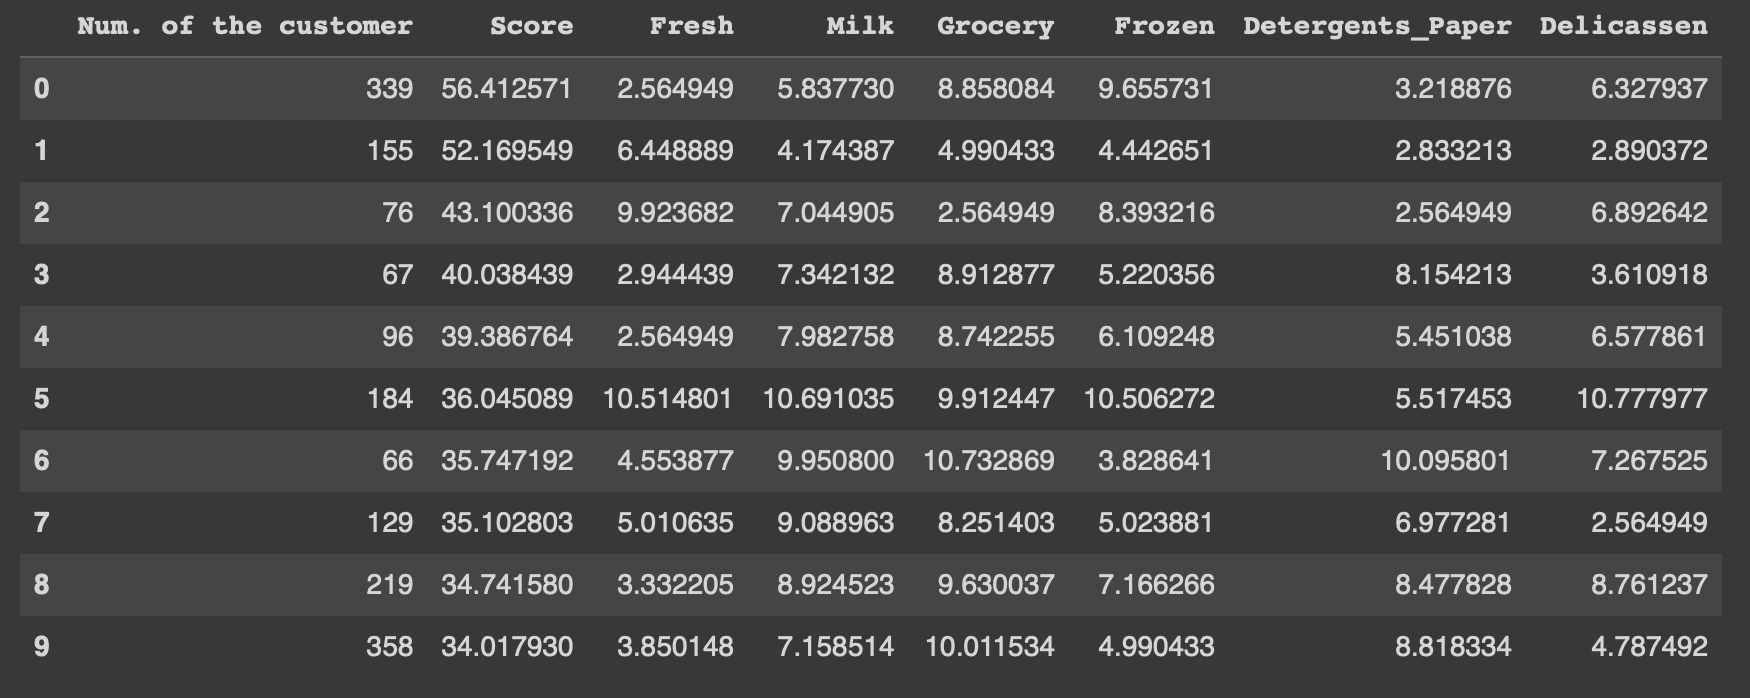

In [ ]:
# the spendings of the top-10 anomalous instances
Image("/content/drive/MyDrive/labML/image1.png")

## 4.3.⁠ The most contributed feature to the anomaly scores?

In [ ]:
mean_feature_contributions = np.mean(feature_contributions, axis=0)
df_means = pd.DataFrame({k: [v] for k, v in zip(categories, mean_feature_contributions)})

tasks = ["total", "channel 1", "channel 2", "region 1", "region 2", "region 3"]
tasks_indices = []

channel = np.array(data["Channel"])
idx_channel1 = np.where(channel == 1)
idx_channel2 = np.where(channel == 2)
tasks_indices.append(idx_channel1)
tasks_indices.append(idx_channel2)

region = np.array(data["Region"])
idx_region1 = np.where(region == 1)
idx_region2 = np.where(region == 2)
idx_region3 = np.where(region == 3)
tasks_indices.append(idx_region1)
tasks_indices.append(idx_region2)
tasks_indices.append(idx_region3)

for i, task in enumerate(tasks):
  if i == 0:
    continue
  contribution = np.mean(feature_contributions[tasks_indices[i - 1]], axis=0)
  df_means.loc[i + 1] = contribution
df_means.index = tasks

In [ ]:
df_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
total,2.943971,1.694657,1.494041,2.740328,2.751812,2.547973
channel 1,2.635883,1.739868,1.506352,2.631433,2.765948,2.415437
channel 2,3.590522,1.599779,1.468205,2.968855,2.722148,2.826111
region 1,2.648085,1.698856,1.442940,2.470154,2.794168,2.281499
region 2,3.276541,1.611121,1.315416,2.696144,2.677278,2.267846
region 3,2.966606,1.706059,1.533060,2.812733,2.752577,2.654569


In analyzing the overall feature contribution for the dataset, we calculated the mean contribution of each feature. The results indicate that the Fresh product is the most significant determinant in identifying outlier purchases, with a mean contribution value of 2.943. This is followed closely by Detergents (2.751) and Frozen products (2.740). Delicatessen ranks next with a mean contribution value of 2.547. Grocery has the least impact, with a mean contribution value of 1.494.

Additionally, the table shows the influence of various features on the anomaly scores of wholesale customers corresponding to each metadata category. Let's first examine the Channel feature. Although the contribution of the six features to the anomalies of wholesale customers in each channel is generally similar, the Fresh feature has a higher contribution in channel 2. Fresh products are challenging to handle and must be sold quickly, leading to a clear distinction between retailers that serve Fresh products and those that do not. This likely explains the higher contribution of this feature to the anomaly score. In contrast, most of the whole sale customers in channel 1 consider Fresh products essential, resulting in a lower contribution of the Fresh feature compared to channel 2.

Next, let's consider the contributions by region. For all three regions, the contributions are similar across features except for Fresh. The contribution of Fresh is highest in region 2, which is likely influenced by the geographic characteristics mentioned earlier.